In [161]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 6))



# Data Cleansing

In [162]:
books = pd.read_csv('books.csv')

In [163]:
books.shape

(1500, 22)

In [164]:
books = books.drop(columns=['country', 'domain', 'gallery', 'image', 'model', 'url', 'weight', 'uniq_id', 'type'])

In [165]:
books_desc = books['desc']
books_desc[0]

'{"Description"=>{"Product Code"=>"9780553590487_20567", "ISBN-13"=>"9780553590487", "ISBN-10"=>"553590480", "Authored By"=>"Kay Hooper", "Publication Year"=>"2007", "Imprint"=>"Bantam", "Binding"=>"Others", "Languages"=>"English", "ISBN 13"=>"9780553590487"}, "Shipping Details"=>{"Estimated Arrival"=>"8 - 11 days", "Return Policy"=>"Seller will accept returns within a 15 days from date of delivery of the item"}}'

In [166]:
book_parse_desc = []
from ast import literal_eval
for a in books_desc:
    r = a.replace('=>', ':')
    r = r.replace('{"Description":', '')
    r = r.replace('{', '')
    r = r.replace('}', '')
    r = r.replace("'", "")
    r = r.replace("Shipping Details", '')
    r = r.replace("Terms & Condition", '')
    r = r.replace("Product Details", '')
    r = r.replace("Warranty Details", '')
    r = r.replace("Description", '')    
    r = r.replace('""' + ':', '')
    r = r.replace(' , ', '')
    r = "{" + r + "}"
    r = literal_eval(r)
    book_parse_desc.append(r)    

In [167]:
#books_desc
books1 = pd.DataFrame(x for x in book_parse_desc)


In [168]:
books1['Author'] = books1['Author'].map(str).replace('nan', '') + ' ' + books1['Authored By']
books1['Publisher'] = books1['Publisher'].map(str).replace('nan', '') + ' ' + books1['Publisher Name']

books1 = books1.drop(columns=['Authored By', 'Publisher Name'])

In [169]:
books1.head()

,About the Author,Age,Age wise,Author,Author Info,Binding,Brand,Dimensions (L X B X H),Edited By,Edition,...,Return Policy,Series Name,Shipping Charge,Specialization,Type,University,Warranty Summary,Weight,Weight(Gm),Weight(gm)
0,NaN,NaN,NaN,Kay Hooper,NaN,Others,NaN,NaN,NaN,NaN,...,Seller will accept returns within a 15 days fr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Devaki Nandan Khatri,NaN,Paperback,Rupa Publications India,NaN,NaN,NaN,...,Seller will accept returns within a 15 days fr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Tami Hoag,NaN,Paperback,Random House,NaN,NaN,2,...,Seller will accept returns within 7 days from...,NaN,NaN,NaN,NaN,NaN,NaN,410 gm,NaN,NaN
3,NaN,NaN,NaN,Danielle Steel,NaN,Paperback,Transworld Publishers,NaN,NaN,NaN,...,Seller will accept returns within a 15 days fr...,NaN,NaN,NaN,NaN,NaN,NaN,381 gm,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Paperback,Books,NaN,NaN,NaN,...,Seller will accept returns within a 15 days fr...,NaN,NaN,NaN,NaN,NaN,NaN,500 gm,NaN,NaN


In [170]:
new_books = pd.concat([books, books1], axis=1)

In [171]:
other_sellers = books['other_sellers']
other_seller1 = []
other_seller2 = []
other_seller3 = []
other_seller4 = []
other_seller5 = []
other_seller6 = []
other_sellers = other_sellers.fillna('[{"name":"none"}]')
ex2 = []

In [172]:
for index, val in enumerate(other_sellers):
    if ("},{" not in other_sellers[index]): 
        other_seller1.append(val)
        other_seller2.append('[{"name": "none"}]')
        other_seller3.append('[{"name": "none"}]')
        other_seller4.append('[{"name":"none"}]')
        other_seller5.append('[{"name":"none"}]')
    
    elif ("},{" in other_sellers[index]): 
        try: 
            OS1, OS2 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append('[{"name":"none"}]')
            other_seller4.append('[{"name":"none"}]')
            other_seller5.append('[{"name":"none"}]')
                        
        except:
            pass
        
        try: 
            OS1, OS2, OS3 = other_sellers[index].split("},{")
            other_seller1.append(OS1+ "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append('[{"name":"none"}]')
            other_seller5.append('[{"name":"none"}]')
                       
        except:
            pass
    
        try: 
            OS1, OS2, OS3, OS4 = other_sellers[index].split("},{")
            other_seller1.append(OS1+ "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append('[{"name":"none"}]')
                        
        except:
            pass
       
        try: 
            OS1, OS2, OS3, OS4, OS5 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")

        except:
            pass
       
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass

        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2+ "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20, OS21 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20, OS21, OS22 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass

        

In [173]:
import json
other_seller1new = []
other_seller2new = []
other_seller3new = []
other_seller4new = []
other_seller5new = []

for i in other_seller1:
    r = i.replace('[', '')
    r = r.replace(']', '')
#     ex2.append(r)
    other_seller1new.append(json.loads(r))

for l in other_seller2:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller2new.append(json.loads(r))
    
for l in other_seller3:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller3new.append(json.loads(r))
    
for l in other_seller4:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller4new.append(json.loads(r))
    
for l in other_seller5:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller5new.append(json.loads(r))
    

In [174]:
OS1 = pd.DataFrame(x for x in other_seller1new)
OS1 = OS1[['name','offer_price']]
OS1 = OS1.rename(index=str, columns={"name":"seller1_name", "offer_price": "seller1_selling_price"})

OS2 = pd.DataFrame(x for x in other_seller2new)
OS2 = OS2[['name','offer_price']]
OS2 = OS2.rename(index=str, columns={"name":"seller2_name", "offer_price": "seller2_selling_price"})

OS3 = pd.DataFrame(x for x in other_seller3new)
OS3 = OS3[['name','offer_price']]
OS3 = OS3.rename(index=str, columns={"name":"seller3_name", "offer_price": "seller3_selling_price"})

OS4 = pd.DataFrame(x for x in other_seller4new)
OS4 = OS4[['name','offer_price']]
OS4 = OS4.rename(index=str, columns={"name":"seller4_name", "offer_price": "seller4_selling_price"})

OS5 = pd.DataFrame(x for x in other_seller5new)
OS5 = OS5[['name','offer_price']]
OS5 = OS5.rename(index=str, columns={"name":"seller5_name", "offer_price": "seller5_selling_price"})

In [175]:
OS1.head()

,seller1_name,seller1_selling_price
0,A1,359.0
1,comma365,316.0
2,none,NaN
3,comma365,319.0
4,NSGlobal,1949.0


In [176]:
OS1.index = OS1.index.astype(int)
OS2.index = OS2.index.astype(int)
OS3.index = OS3.index.astype(int)
OS4.index = OS4.index.astype(int)
OS5.index = OS5.index.astype(int)

new_books = pd.merge(books, books1, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS1, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS2, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS3, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS4, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS5, left_index=True, right_index=True)


In [177]:
new_books = new_books.drop(columns=['desc', 'insertedon', 'other_sellers', 'specifications'])


In [178]:
publisher_new_books = new_books['brand'].fillna(new_books['Publisher'])
publisher_new_books
new_books = new_books.merge(publisher_new_books.to_frame(), left_index=True, right_index=True)
#new_books

In [179]:
new_books = new_books.drop(columns=['brand_x', 'Publisher'])
new_books

,amtsave,breadcrumbs,discount,list_price,name,payment_methods_supported,productcode,selling_price,About the Author,Age,...,seller1_selling_price,seller2_name,seller2_selling_price,seller3_name,seller3_selling_price,seller4_name,seller4_selling_price,seller5_name,seller5_selling_price,brand_y
0,72,Books | Literature & Fiction | Romance | C.J.'...,20%%,358,C.J.'s Fate,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",2431977,286,NaN,NaN,...,359.0,none,NaN,none,NaN,none,NaN,none,NaN,NaN
1,117,Books | Literature & Fiction | Short Stories |...,30%%,395,Chandrakanta,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",22655539,278,NaN,NaN,...,316.0,Starmark,356.0,Aarohi Online Book Shop,495.0,none,NaN,none,NaN,Rupa Publications India
2,57,Books | Literature & Fiction | Romance | Heart...,14%%,416,Heart Of Dixie,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13587974,359,NaN,NaN,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
3,84,Books | Literature & Fiction | General | Perfe...,21%%,399,Perfect Life,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",29545536,315,NaN,NaN,...,319.0,Sagar Enterprises,319.0,BOOKSMANDI,339.0,Dux Marketing Services,369.0,Booknest,399.0,Transworld Publishers
4,1050,Books | Literature & Fiction | Literature | Pa...,35%%,2999,Paulo Coelho The Golden Collection,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",23104384,1949,NaN,NaN,...,1949.0,GS RETAIL,1949.0,Onebuy.in,2249.0,BSSdelhi,2308.0,Book Place,2339.0,Books
5,63,Books | Literature & Fiction | Suspense Thrill...,14%%,462,The Devil's Banker,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",12136614,399,NaN,NaN,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
6,75,Books | Literature & Fiction | Suspense Thrill...,14%%,554,The Brethren,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",10046244,479,NaN,NaN,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Dell
7,53,Books | Literature & Fiction | General | The I...,11%%,485,The Innocent,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",32878233,432,NaN,NaN,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
8,63,Books | Literature & Fiction | Romance | True ...,14%%,462,True Love,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13669961,399,NaN,NaN,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
9,90,Books | Literature & Fiction | General | Warri...,36%%,250,Warriors: Power of Three #3: Outcast,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",44858122,160,NaN,NaN,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Harper Collins Publishers India


# What are the Top Selling Books and Their Prices

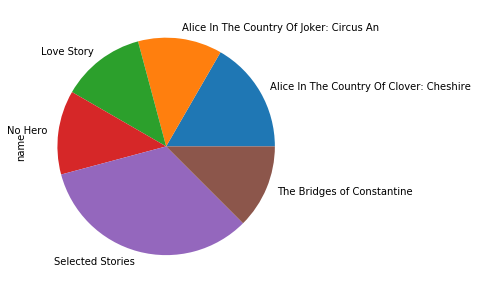

In [180]:
new_books.name.value_counts()[0:6].sort_index().plot.pie(figsize=(15,5))

In [181]:
new_books.name.value_counts()[0:6]

Selected Stories                            8
Alice In The Country Of Clover: Cheshire    4
The Bridges of Constantine                  3
Love Story                                  3
No Hero                                     3
Alice In The Country Of Joker: Circus An    3
Name: name, dtype: int64

In [182]:
selected_stories = new_books[new_books.name == "Selected Stories"].selling_price.mean()
alice_clover  = new_books[new_books.name == "Alice In The Country Of Clover: Cheshire"].selling_price.mean()
love_story = new_books[new_books.name == "Love Story"].selling_price.mean()
alice_joker = new_books[new_books.name == "Alice In The Country Of Joker: Circus An"].selling_price.mean()
no_hero = new_books[new_books.name == "No Hero"].selling_price.mean()
bridges = new_books[new_books.name == "The Bridges of Constantine"].selling_price.mean()


In [183]:
print(selected_stories)
print(alice_clover)
print(love_story)
print(alice_joker)
print(no_hero)
print(bridges)


98.0
639.0
145.66666666666666
599.0
424.3333333333333
323.0


# What Categories Of Books are Selling the Most

In [184]:
cat = new_books['breadcrumbs']

In [185]:
cat.head()

0    Books | Literature & Fiction | Romance | C.J.'...
1    Books | Literature & Fiction | Short Stories |...
2    Books | Literature & Fiction | Romance | Heart...
3    Books | Literature & Fiction | General | Perfe...
4    Books | Literature & Fiction | Literature | Pa...
Name: breadcrumbs, dtype: object

In [186]:
new_cat = []
for ca in cat:
    first = ca.replace('Books | ', '')
    comma = first.replace(' | ', ',')
    comma = ",".join(comma.split(",")[:2])
    
    new_cat.append(comma)
cat = new_cat        
    

In [187]:
cat[0:5]

['Literature & Fiction,Romance',
 'Literature & Fiction,Short Stories',
 'Literature & Fiction,Romance',
 'Literature & Fiction,General',
 'Literature & Fiction,Literature']

In [188]:
len(new_books['breadcrumbs'].value_counts())

1471

In [189]:
new_books['breadcrumbs'] = cat

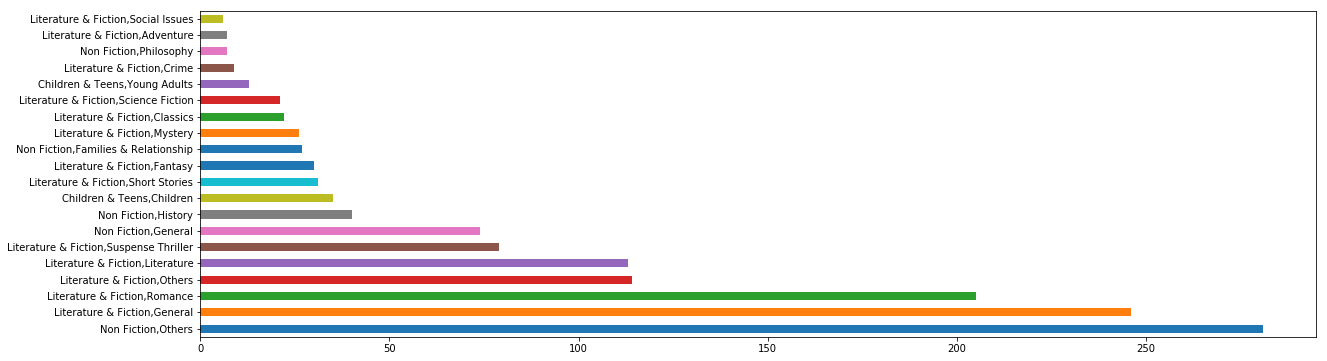

In [190]:
new_books['breadcrumbs'].value_counts().head(20).plot.barh()

# Who are the Best Selling Authors 

In [254]:
authors = pd.DataFrame(data = new_books.Author.value_counts()).index

In [255]:
prices = []
def calculate_author_avg(names):
    for i in names:
        price = new_books[new_books.Author == i].selling_price.mean()
        prices.append(price)

calculate_author_avg(authors)



In [256]:
authors_df = pd.DataFrame(data = new_books.Author.value_counts())

In [257]:
authors_df['avg_prices'] = prices

In [258]:
authors_df[0:10]

,Author,avg_prices
Iris Johansen,27,385.407407
Danielle Steel,25,298.800000
Mary Balogh,21,388.619048
Kay Hooper,15,379.666667
Terry O�Brien,10,98.800000
John Grisham,9,384.666667
Chetan Bhagat,8,257.375000
Karen Marie Moning,8,399.000000
Nora Roberts,8,360.000000
Julie Garwood,8,328.000000


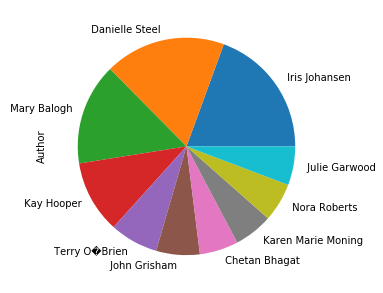

In [259]:
authors_df[0:10].plot.pie(y='Author', figsize=(5, 5), legend=False)

In [260]:
authors_df.describe()

,Author,avg_prices
count,689.000000,689.000000
mean,1.493469,604.211389
std,1.923017,795.322319
min,1.000000,64.000000
25%,1.000000,259.000000
50%,1.000000,399.000000
75%,1.000000,718.000000
max,27.000000,12801.000000


In [265]:
price_bins = []

for price in authors_df['avg_prices']:
    if(price <= 200):
        price_bins.append('$0-200')
    if(price > 200 and price <= 400):
        price_bins.append('$200-400')
    if(price > 400 and price <= 600):
        price_bins.append('$400-600')
    if(price > 600 and price <= 800):
        price_bins.append('$600-800')
    if(price > 800):
        price_bins.append('$800+')

authors_df['bins'] = price_bins

In [266]:
len(authors_df)

689

In [267]:
price_counts = []
    
price_counts.append(authors_df[authors_df['bins'] == '$0-200'].Author.sum()) 
price_counts.append(authors_df[authors_df['bins'] == '$200-400'].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == '$400-600'].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == '$600-800'].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == '$800+'].Author.sum())


In [268]:
price_counts

[129, 501, 105, 155, 139]

In [269]:
bins = list(set(price_bins))

Text(0.5, 1.0, 'Number of Books SOLD by Author Categorized in Bins')

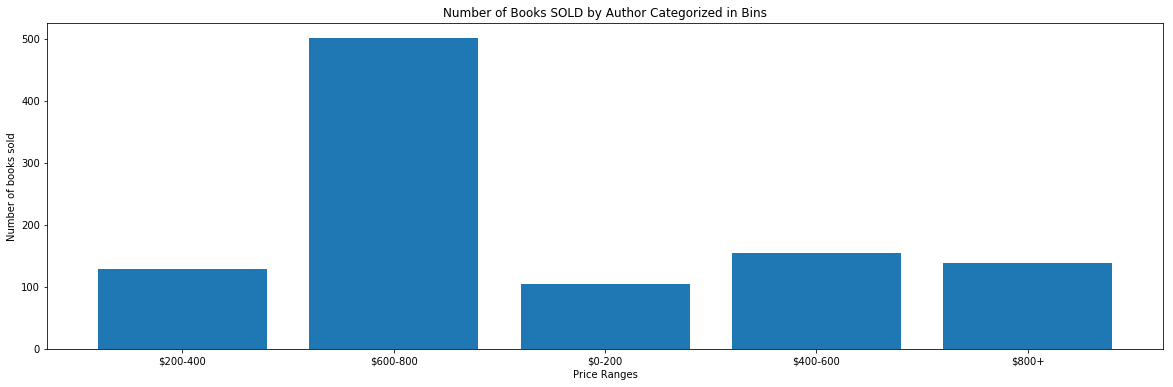

In [271]:
plt.bar(bins, price_counts)
plt.xlabel ('Price Ranges')
plt.ylabel ('Number of books sold')
plt.title('Number of Books SOLD by Author Categorized in Bins')


# Are Customers buying High Discounted or Low Discounted Items

In [204]:
discount = new_books['discount']

In [205]:
new_discount = []
for dis in discount:
    new_discount.append(dis.replace('%%', '%'))
    
new_books['discount'] = new_discount

In [206]:
new_books.discount.head()

0    20%
1    30%
2    14%
3    21%
4    35%
Name: discount, dtype: object

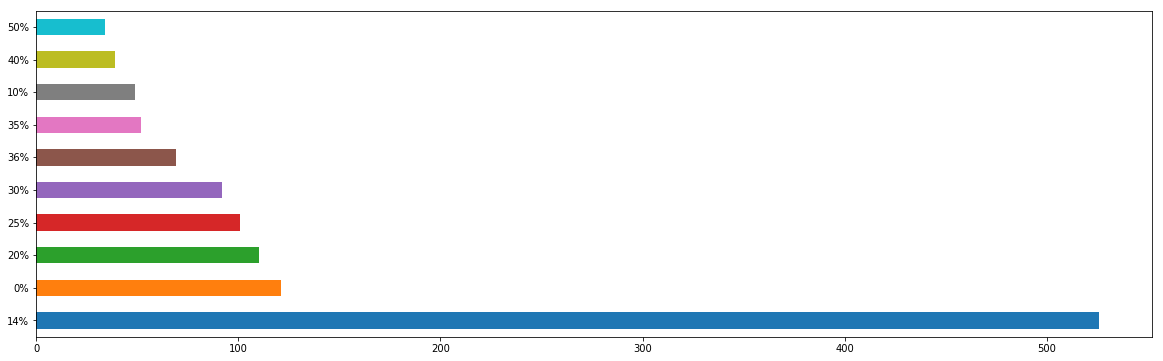

In [207]:
new_books["discount"].value_counts().head(10).plot.barh()

# What are the average prices that get Discounted

In [208]:
top10_discount_index = new_books["discount"].value_counts().head(10).index

In [209]:
top10_discount = new_books["discount"].value_counts().head(10)

In [210]:
mean_prices = []
mean_selling_prices = []
for top in top10_discount_index:
    mean_prices.append(new_books[new_books['discount'] == top].list_price.mean())
    selling_prices.append(new_books[new_books['discount'] == top].selling_price.mean())


In [211]:
new_books[new_books['discount'] == "50%"].selling_price.mean()

228.94117647058823

In [212]:
selling_prices = selling_prices[0:10]

In [213]:
top10_discount = pd.DataFrame(data = top10_discount)
top10_discount['Number Sold'] = top10_discount['discount']
top10_discount = top10_discount.drop(columns='discount')

In [214]:
top10_discount['avg_listing_price'] = mean_prices
top10_discount['avg_selling_price'] = selling_prices

In [215]:
top10_discount

,Number Sold,avg_listing_price,avg_selling_price
14%,526,855.669202,738.918251
0%,121,509.000000,509.000000
20%,110,533.090909,426.409091
25%,101,846.742574,634.960396
30%,92,417.586957,292.391304
36%,69,350.057971,223.927536
35%,52,658.788462,427.865385
10%,49,491.142857,442.142857
40%,39,1218.948718,731.256410
50%,34,458.588235,228.941176


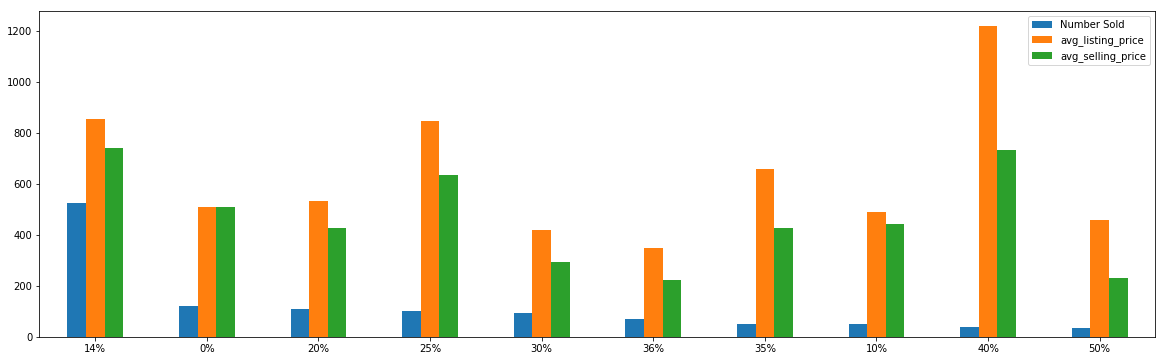

In [216]:
top10_discount.plot.bar(rot=0)


# Limitations and Possible Future Work

When we initially found the dataset, we planned to aquire more data by using a web scrapper that would scrappe the following : <br> <ul><li>Amazon Avergae Ratings</li> <br><li> Reviews </li><br> </ul> We would use ratings to see if ratings influence ratings and reviews to do sentiment analysis to see how satisfied people might be when they purchase these types of books. <br> <br>Amazon had scrapper restrictions and their APIs don't provide ratings and reviews. We used Google Books API but that had very small number of ratings for the books.